Dataset loaded successfully!
Shape of original dataset: (255347, 18)
Shape of random sample dataset: (40000, 18)
Dataset information:
<class 'pandas.DataFrame'>
Index: 40000 entries, 51139 to 11401
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          40000 non-null  str    
 1   Age             40000 non-null  int64  
 2   Income          40000 non-null  int64  
 3   LoanAmount      40000 non-null  int64  
 4   CreditScore     40000 non-null  int64  
 5   MonthsEmployed  40000 non-null  int64  
 6   NumCreditLines  40000 non-null  int64  
 7   InterestRate    40000 non-null  float64
 8   LoanTerm        40000 non-null  int64  
 9   DTIRatio        40000 non-null  float64
 10  Education       40000 non-null  str    
 11  EmploymentType  40000 non-null  str    
 12  MaritalStatus   40000 non-null  str    
 13  HasMortgage     40000 non-null  str    
 14  HasDependents   40000 non-null  str    
 15 

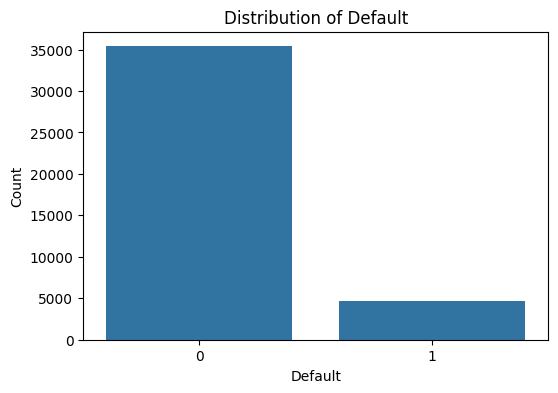

Categorical Columns: Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='str')
High-cardinality columns excluded: ['LoanID']
Shape after encoding: (40000, 25)
Feature shape: (40000, 24)
Target shape: (40000,)
Training feature shape: (32000, 24)
Training target shape: (32000,)
Feature scaling completed!


In [ ]:
#import dependacies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#ignore warnigs
import warnings
warnings.filterwarnings('ignore')

#load the dataset   
data = pd.read_csv('../dataset/Loan_default.csv')

#print sucess message
print("Dataset loaded successfully!")

#print shape of original dataset
print("Shape of original dataset:", data.shape)

#random sample of 40000 rows from the dataset
data = data.sample(n=40000, random_state=42)

#shape of the random sample dataset
print("Shape of random sample dataset:", data.shape)

#dataset information
print("Dataset information:")
print(data.info())

#statistical summary of the dataset
print("Statistical summary of the dataset:")
print(data.describe())

#missing values in the dataset
print("Missing values in the dataset:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values for categorical columns with mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Fill missing values for numeric columns with median
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Verify that there are no more missing values
print("Missing values after imputation:")
missing_values_after = data.isnull().sum()
print(missing_values_after[missing_values_after > 0])

print("Target variable distribution:")
print(data['Default'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=data)
plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

# Drop LoanID column (identifier, not a feature)
data.drop('LoanID', axis=1, inplace=True)
print("Dropped LoanID column")

# Convert binary Yes/No columns to 0/1
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
print("Converted binary columns:", binary_cols)

# Ordinal encode Education (High School < Bachelor's < Master's < PhD)
education_order = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
data['Education'] = data['Education'].map(education_order)
print("Ordinal encoded Education column")

# One-hot encode remaining categorical columns (EmploymentType, MaritalStatus, LoanPurpose)
categorical_cols = data.select_dtypes(include=['object']).columns
print("Remaining categorical columns for one-hot encoding:", list(categorical_cols))

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", data_encoded.shape)

#define features and target variable
x = data_encoded.drop('Default', axis=1)
y = data_encoded['Default']

print("Feature shape:", x.shape)
print("Target shape:", y.shape)

#train test split
x_train, x_test, y_train, y_test = train_test_split(
     x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training feature shape:", x_train.shape)
print("Training target shape:", y_train.shape)

#feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print("Feature scaling completed!")
